In [2]:
import numpy as np
import numpy.typing as npt
import pandas as pd

from sklearn.preprocessing import StandardScaler

import umap

In [3]:
%load_ext rpy2.ipython

In [42]:
def run_umap(df: pd.DataFrame, nn: int=15, md: float=0.2, somr: float=0.25, nc: int=2) -> tuple[npt.NDArray[np.float64], umap.UMAP]:
    umapper = umap.UMAP(
        n_neighbors=nn,
        n_components=nc,
        min_dist=md,
        set_op_mix_ratio=somr,
        metric='euclidean',
        # UMAP figures change with every run if not seeded
        random_state=2023
    )

    return (umapper.fit_transform(df), umapper)

In [44]:
stops_tidy = pd.read_csv('../data/arist_corpus.csv',index_col=0)
stops_tidy

,Translator,Work,Chunk,atqui,aut,autem,certe,ceu,confestim,cum,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
0,Bur,EthV,duplici autem virtute existente hac quidem int...,0.000000,0.062338,0.685717,0.0,0.0,0.0,0.020779,...,0.207793,0.000000,0.0,0.000000,0.207793,0.041559,0.0,0.0,0.145455,0.0
1,Bur,EthV,malicia autem contrarium fiet autem nobis et e...,0.000000,0.049793,0.813285,0.0,0.0,0.0,0.000000,...,0.165977,0.000000,0.0,0.000000,0.016598,0.066391,0.0,0.0,0.066391,0.0
2,Bur,EthV,bene habentibus operis quoniam neque auferendu...,0.000000,0.000000,0.896433,0.0,0.0,0.0,0.011493,...,0.034478,0.000000,0.0,0.000000,0.091942,0.011493,0.0,0.0,0.045971,0.0
3,Bur,EthV,et medietas amicicia qui superhabundat autem q...,0.000000,0.064567,0.774798,0.0,0.0,0.0,0.000000,...,0.096850,0.000000,0.0,0.000000,0.080708,0.064567,0.0,0.0,0.032283,0.0
4,Bur,EthV,iacit volens in salute autem sui ipsius et rel...,0.000000,0.150855,0.822845,0.0,0.0,0.0,0.054856,...,0.013714,0.000000,0.0,0.000000,0.095999,0.123427,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Anon,Metaph,palam nec enim impar infinitus est nec par gen...,0.025294,0.328824,0.227648,0.0,0.0,0.0,0.000000,...,0.126471,0.075883,0.0,0.075883,0.430001,0.000000,0.0,0.0,0.455295,0.0
1210,Anon,Metaph,aut non quare eadem accident et sic aut enim n...,0.000000,0.298142,0.238514,0.0,0.0,0.0,0.059628,...,0.089443,0.000000,0.0,0.000000,0.268328,0.000000,0.0,0.0,0.566471,0.0
1211,Anon,Metaph,quidem potentia illud vero actu ergo potentia ...,0.000000,0.380143,0.253429,0.0,0.0,0.0,0.050686,...,0.050686,0.000000,0.0,0.025343,0.456172,0.000000,0.0,0.0,0.481514,0.0
1212,Anon,Metaph,tempori non finis est non etiam erit sempitern...,0.030331,0.242647,0.242647,0.0,0.0,0.0,0.060662,...,0.060662,0.060662,0.0,0.000000,0.121324,0.000000,0.0,0.0,0.454963,0.0


In [45]:
stops_tidy = stops_tidy[stops_tidy.Translator != 'Myst'].reset_index(drop=True)
stops_tidy

,Translator,Work,Chunk,atqui,aut,autem,certe,ceu,confestim,cum,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
0,Bur,EthV,duplici autem virtute existente hac quidem int...,0.000000,0.062338,0.685717,0.0,0.0,0.0,0.020779,...,0.207793,0.000000,0.0,0.000000,0.207793,0.041559,0.0,0.0,0.145455,0.0
1,Bur,EthV,malicia autem contrarium fiet autem nobis et e...,0.000000,0.049793,0.813285,0.0,0.0,0.0,0.000000,...,0.165977,0.000000,0.0,0.000000,0.016598,0.066391,0.0,0.0,0.066391,0.0
2,Bur,EthV,bene habentibus operis quoniam neque auferendu...,0.000000,0.000000,0.896433,0.0,0.0,0.0,0.011493,...,0.034478,0.000000,0.0,0.000000,0.091942,0.011493,0.0,0.0,0.045971,0.0
3,Bur,EthV,et medietas amicicia qui superhabundat autem q...,0.000000,0.064567,0.774798,0.0,0.0,0.0,0.000000,...,0.096850,0.000000,0.0,0.000000,0.080708,0.064567,0.0,0.0,0.032283,0.0
4,Bur,EthV,iacit volens in salute autem sui ipsius et rel...,0.000000,0.150855,0.822845,0.0,0.0,0.0,0.054856,...,0.013714,0.000000,0.0,0.000000,0.095999,0.123427,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Anon,Metaph,palam nec enim impar infinitus est nec par gen...,0.025294,0.328824,0.227648,0.0,0.0,0.0,0.000000,...,0.126471,0.075883,0.0,0.075883,0.430001,0.000000,0.0,0.0,0.455295,0.0
1182,Anon,Metaph,aut non quare eadem accident et sic aut enim n...,0.000000,0.298142,0.238514,0.0,0.0,0.0,0.059628,...,0.089443,0.000000,0.0,0.000000,0.268328,0.000000,0.0,0.0,0.566471,0.0
1183,Anon,Metaph,quidem potentia illud vero actu ergo potentia ...,0.000000,0.380143,0.253429,0.0,0.0,0.0,0.050686,...,0.050686,0.000000,0.0,0.025343,0.456172,0.000000,0.0,0.0,0.481514,0.0
1184,Anon,Metaph,tempori non finis est non etiam erit sempitern...,0.030331,0.242647,0.242647,0.0,0.0,0.0,0.060662,...,0.060662,0.060662,0.0,0.000000,0.121324,0.000000,0.0,0.0,0.454963,0.0


In [12]:
stops_tidy[stops_tidy.Work.str.startswith('Rhet')]

,Translator,Work,Chunk,atqui,aut,autem,certe,ceu,confestim,cum,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
630,Bxx,Rhet,rethorica est convertibilis dialetice utreque ...,0.0,0.394042,0.497737,0.000000,0.0,0.000000,0.020739,...,0.062217,0.041478,0.0,0.020739,0.165912,0.228129,0.000000,0.0,0.331825,0.0
631,Bxx,Rhet,iuverit maxime utens iuste et leserit iniuste ...,0.0,0.277810,0.590345,0.000000,0.0,0.000000,0.052089,...,0.052089,0.156268,0.0,0.034726,0.121542,0.069452,0.000000,0.0,0.347262,0.0
632,Bxx,Rhet,horum cognitum non oportet dicere ipse enim au...,0.0,0.267038,0.534076,0.000000,0.0,0.000000,0.066759,...,0.050070,0.233658,0.0,0.000000,0.183588,0.066759,0.000000,0.0,0.317107,0.0
633,Bxx,Rhet,quomodo non lesit quoniam autem iniustificat n...,0.0,0.524604,0.671493,0.000000,0.0,0.000000,0.000000,...,0.020984,0.041968,0.0,0.020984,0.104921,0.125905,0.000000,0.0,0.104921,0.0
634,Bxx,Rhet,sunt ex quibus autem oportet et de hiis et ali...,0.0,0.636098,0.371057,0.000000,0.0,0.000000,0.070678,...,0.070678,0.035339,0.0,0.000000,0.088347,0.141355,0.000000,0.0,0.512412,0.0
635,Bxx,Rhet,ut puta quorum natura contingit vero et extra ...,0.0,0.501868,0.259587,0.000000,0.0,0.000000,0.017306,...,0.017306,0.173058,0.0,0.000000,0.173058,0.190364,0.000000,0.0,0.380728,0.0
636,Bxx,Rhet,quidem semper et plus ad minus magnum autem et...,0.0,0.446895,0.169512,0.015410,0.0,0.000000,0.015410,...,0.030820,0.092461,0.0,0.046231,0.123281,0.154102,0.000000,0.0,0.385254,0.0
637,Bxx,Rhet,dicit meleagrum persuaderi ab uxore dicente qu...,0.0,0.279386,0.558772,0.000000,0.0,0.000000,0.059868,...,0.039912,0.099781,0.0,0.019956,0.079825,0.079825,0.000000,0.0,0.439035,0.0
638,Bxx,Rhet,de universali et de partibus dictum est secund...,0.0,0.305869,0.415108,0.000000,0.0,0.000000,0.021848,...,0.043696,0.152935,0.0,0.043696,0.218478,0.174783,0.000000,0.0,0.196630,0.0
639,Bxx,Rhet,enim ex contrariis est de accusatione vero et ...,0.0,0.480519,0.294512,0.015501,0.0,0.000000,0.015501,...,0.000000,0.015501,0.0,0.046502,0.062002,0.108504,0.000000,0.0,0.558022,0.0


In [50]:
wil = stops_tidy[stops_tidy.Translator == "Wil"]
bar = stops_tidy[stops_tidy.Translator == "Bar"]
wilrhet = stops_tidy[stops_tidy.Work == "Rhet1"]
wilrhet = wilrhet.replace("Rhet1", "WilRhet")
xxxRhet = stops_tidy[stops_tidy.Work == "Rhet"]
xxxRhet = xxxRhet.replace("Rhet", "xxxRhet")

In [59]:
bar_myst = pd.concat([bar, xxxRhet])
bar_X = bar_myst.drop(["Translator", "Work", "Chunk"], axis=1)
umap_cols, umapper = run_umap(
    StandardScaler().fit_transform(bar_X), md=0.1, nn=8, somr=0.75
)
bar_myst.insert(2, "Y", umap_cols[:, 1])
bar_myst.insert(2, "X", umap_cols[:, 0])

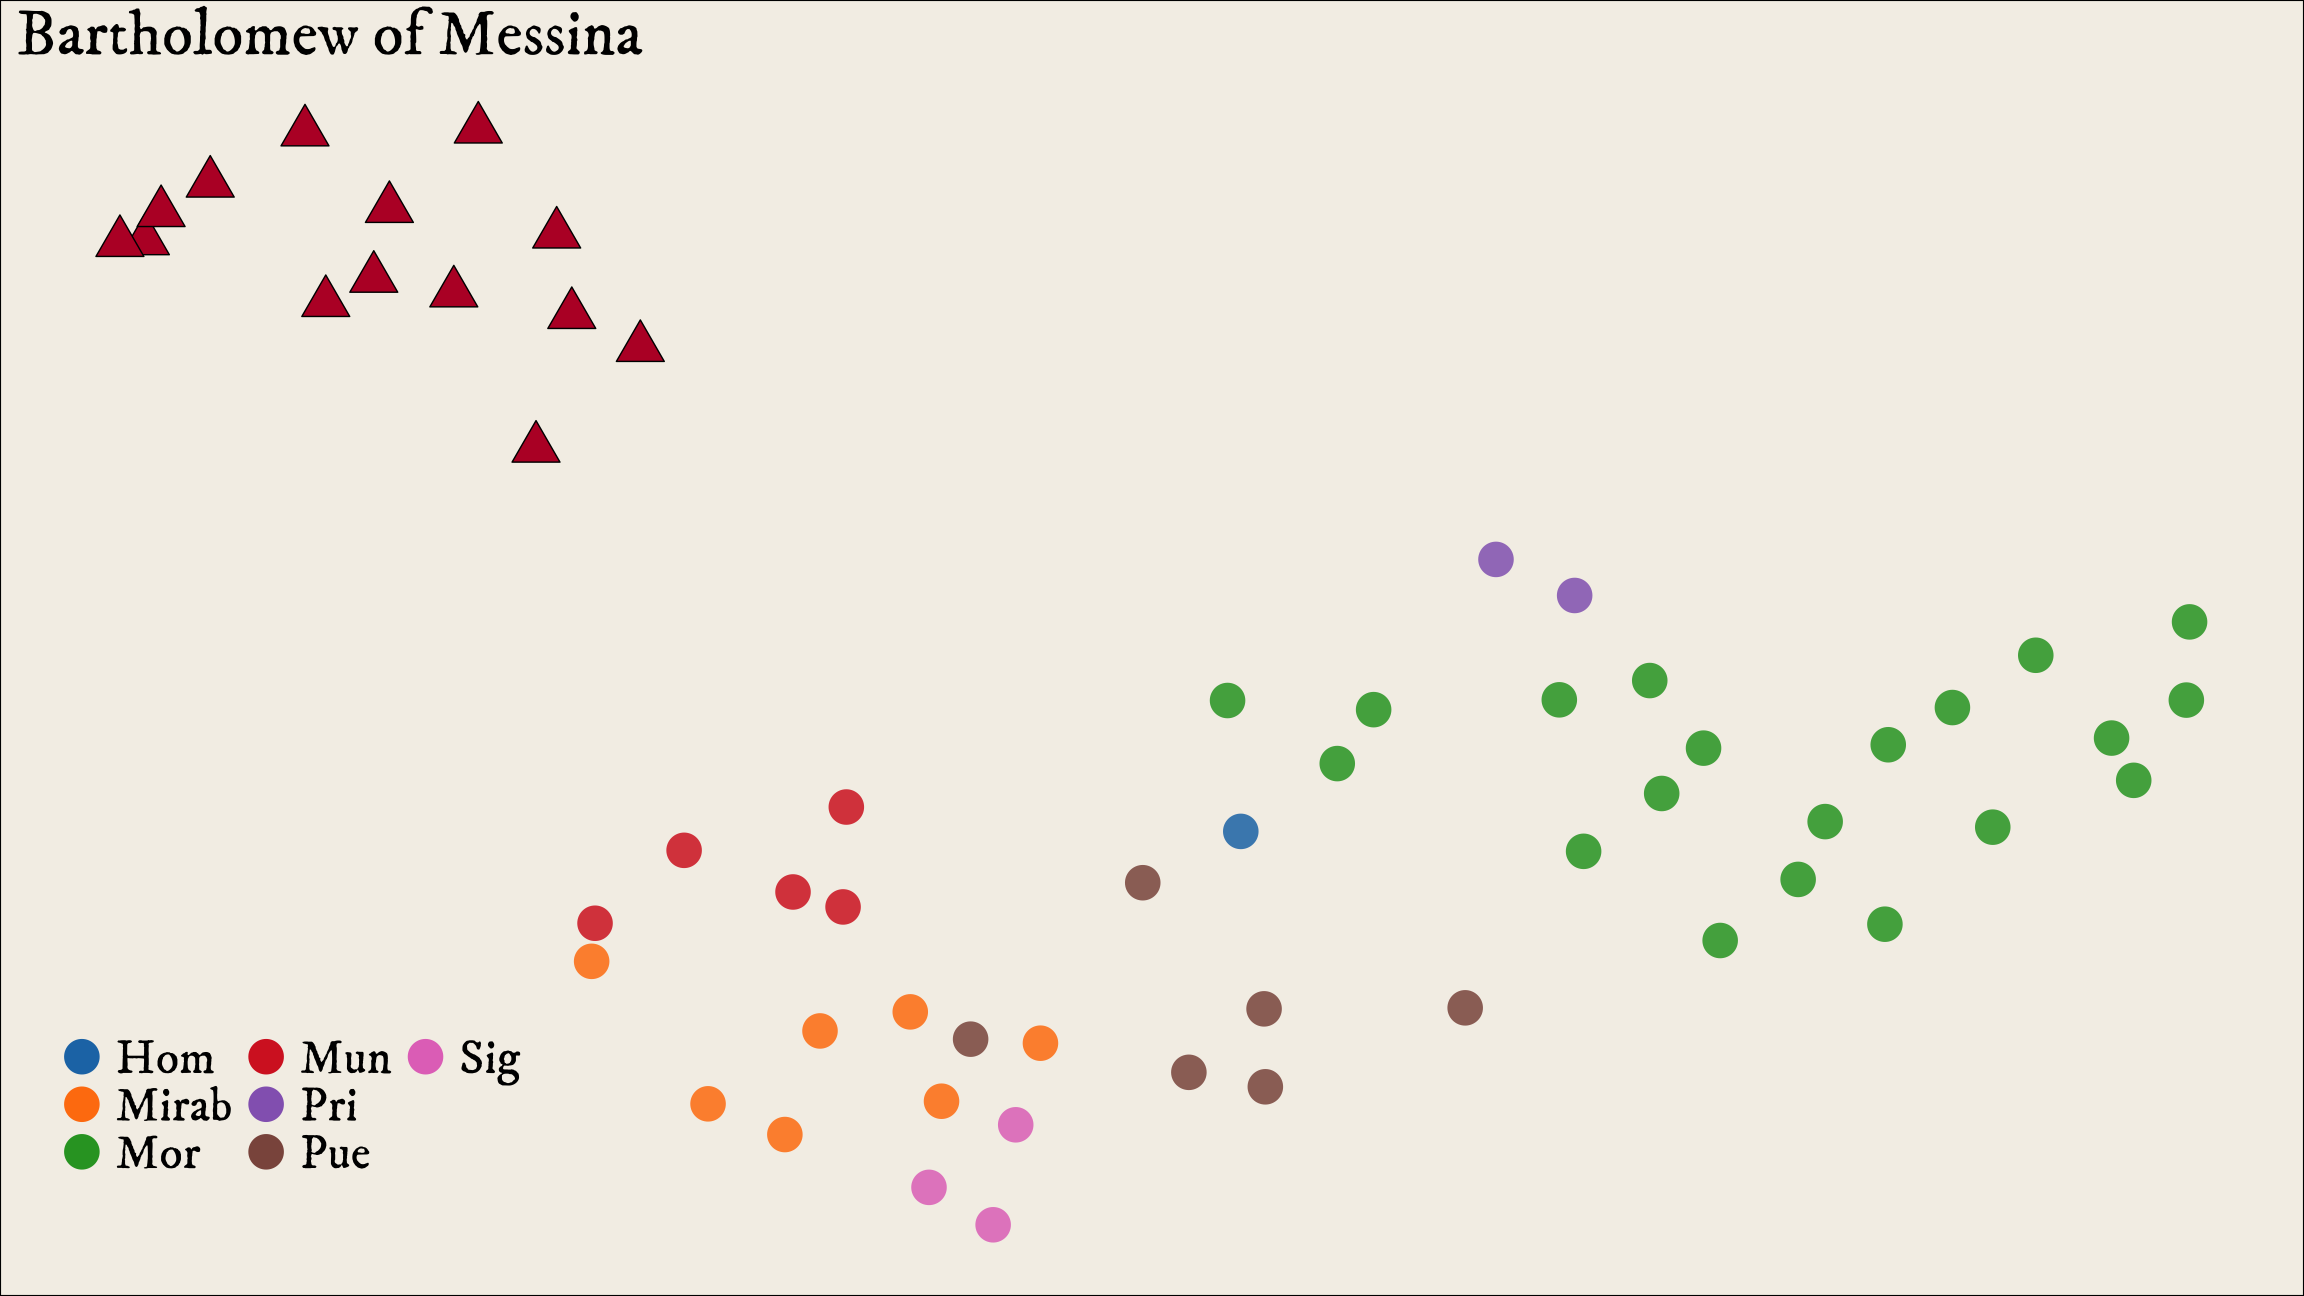

In [60]:
%%R -i bar_myst -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
library(stringr)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=bar_myst, aes(x=X, y=Y)) +
geom_point(data=dplyr::filter(bar_myst,str_detect(Work,'Rhet',negate=TRUE)),size=8, alpha=0.85, shape=16, aes(color=Work)) +
geom_point(data=dplyr::filter(bar_myst,str_detect(Work,'Rhet')), size=8, shape=24, aes(fill=Work), alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s", guide = 'none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("Bartholomew of Messina") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=8,alpha=1)),
) +    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.12,0.15),
        legend.text=element_text(size=24),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_bar.pdf"
# ggsave(fn, dpi=300, width=16, height=9)

In [26]:
wil_myst = pd.concat([wil, wilrhet])
wil_X = wil.drop(["Translator", "Work", "Chunk"], axis=1)
umap_cols, umapper = run_umap(
    StandardScaler().fit_transform(wil_X), md=0.2, nn=8, somr=0.75
)
wil.insert(2, "Y", umap_cols[:, 1])
wil.insert(2, "X", umap_cols[:, 0])

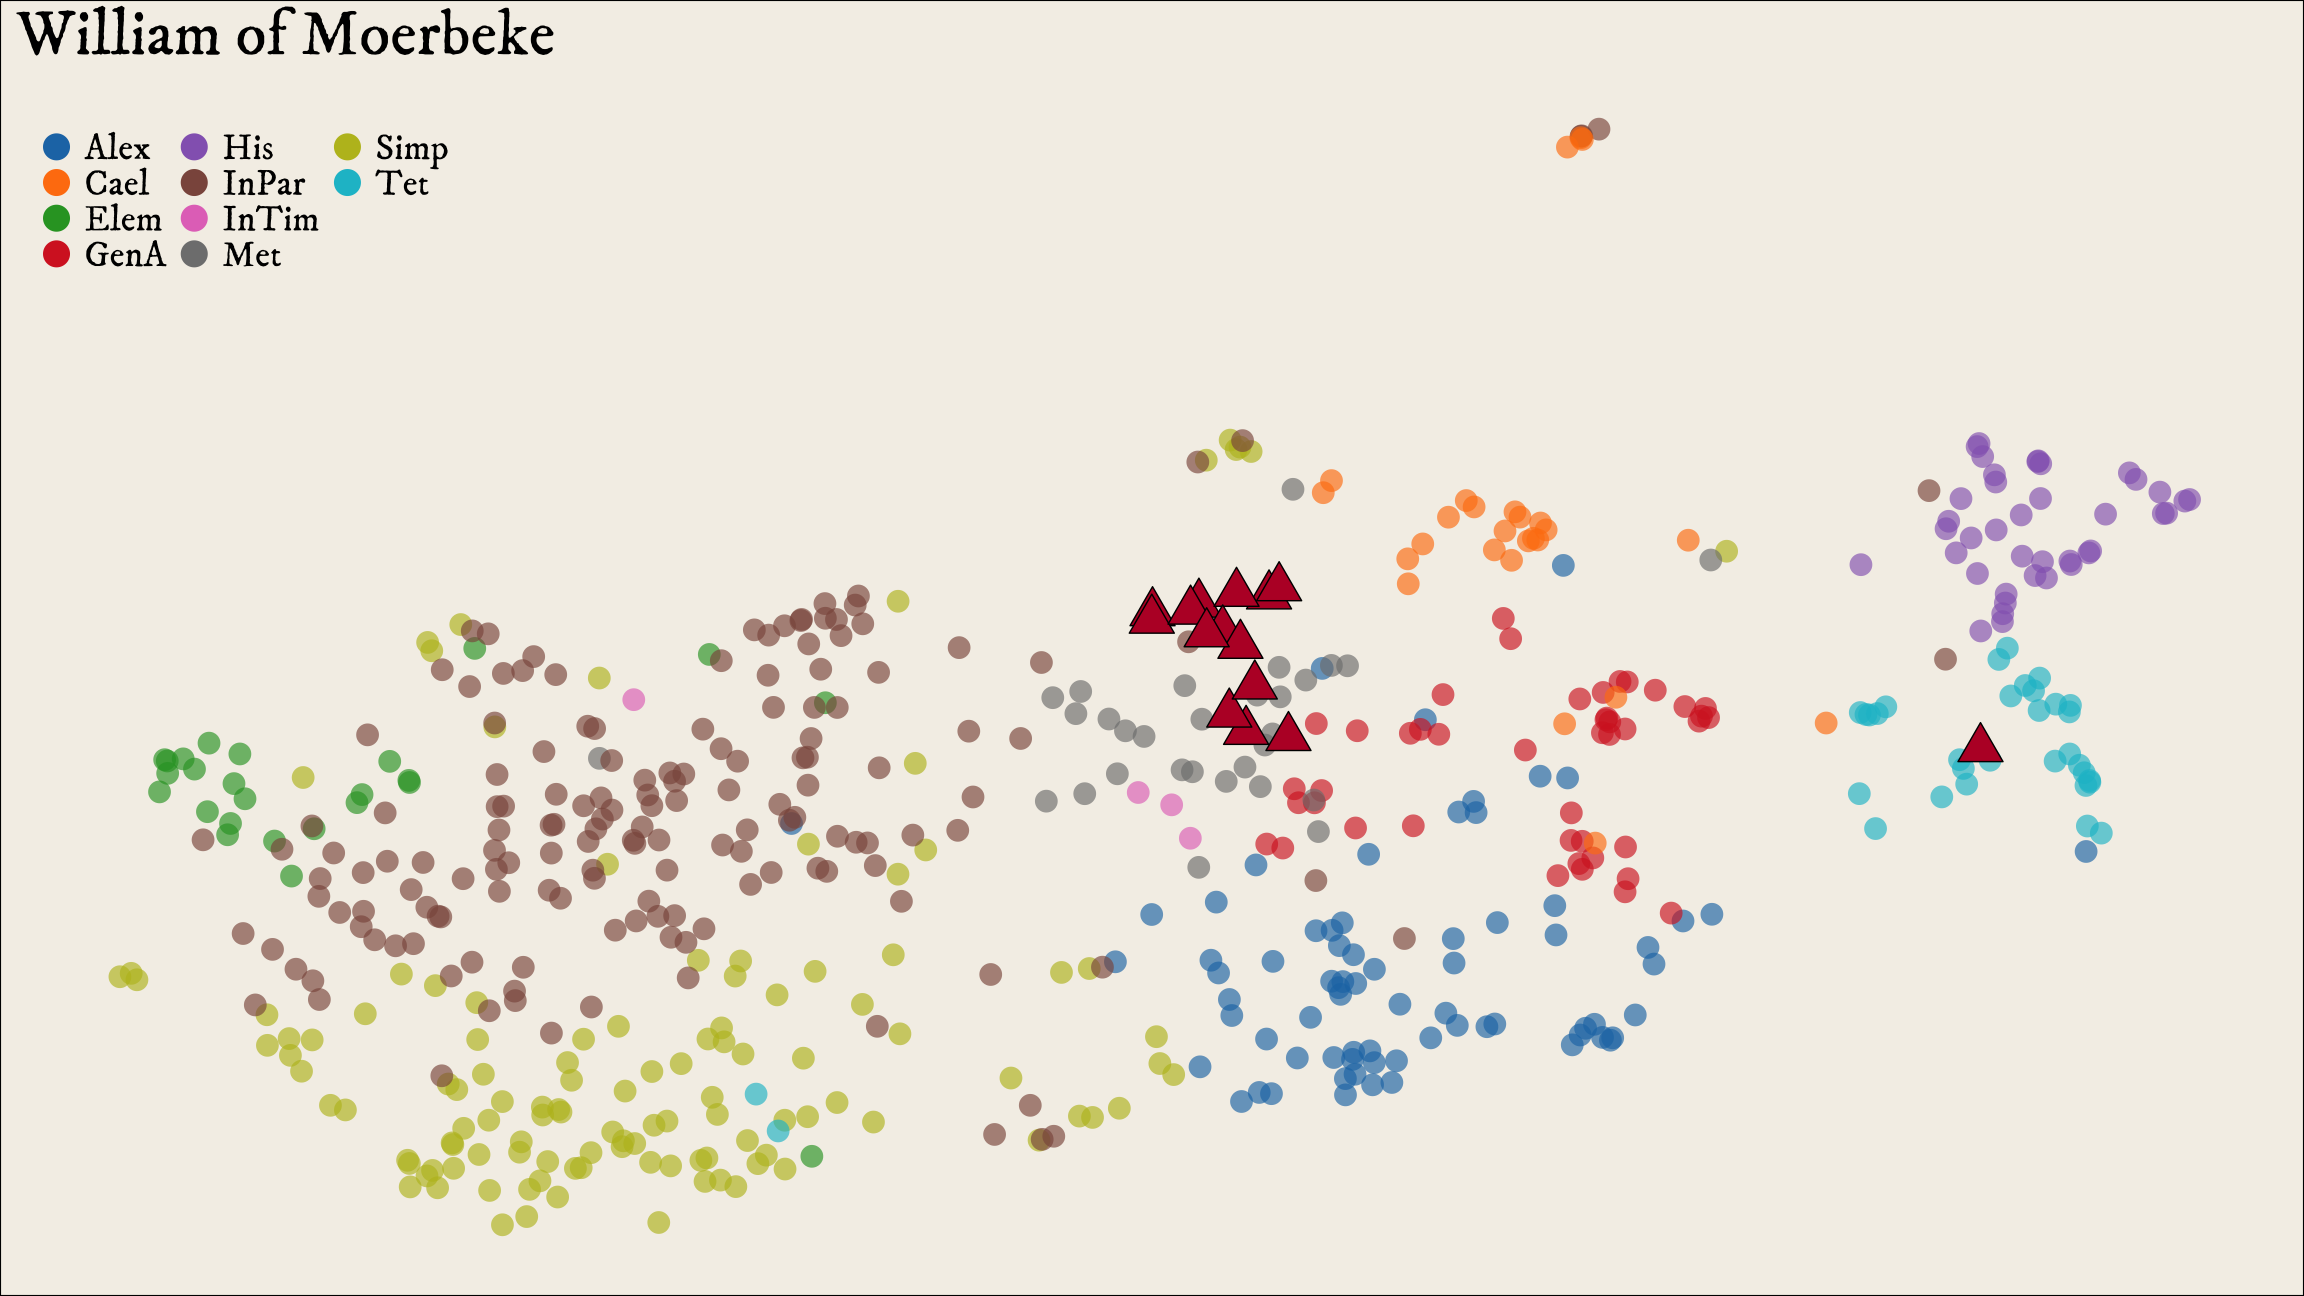

In [34]:
%%R -i wil -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
library(stringr)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=wil, aes(x=X, y=Y)) +
geom_point(data=dplyr::filter(wil,str_detect(Work,'Rhet',negate=TRUE)),size=5, alpha=0.65, shape=16, aes(color=Work)) +
geom_point(data=dplyr::filter(wil,str_detect(Work,'Rhet')), size=7.5, shape=24, aes(fill=Work), alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s", guide = 'none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("William of Moerbeke") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=6,alpha=1)),
) +    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.1,0.9),
        legend.text=element_text(size=18),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_wil.pdf"
# ggsave(fn, dpi=300, width=16, height=9)

In [48]:
all = stops_tidy.copy()

all_X = all.drop(["Translator", "Work", "Chunk"], axis=1)
ss = StandardScaler()
umap_cols, umapper = run_umap(ss.fit_transform(all_X), nc=2, nn=8, somr=0.5, md=0.4)
all.insert(2, "Y", umap_cols[:, 1])
all.insert(2, "X", umap_cols[:, 0])

In addition: Warning message:
In geom_point(data = dplyr::filter(all, str_detect(Translator, "Bar")),  :
  Ignoring unknown parameters: `guide`


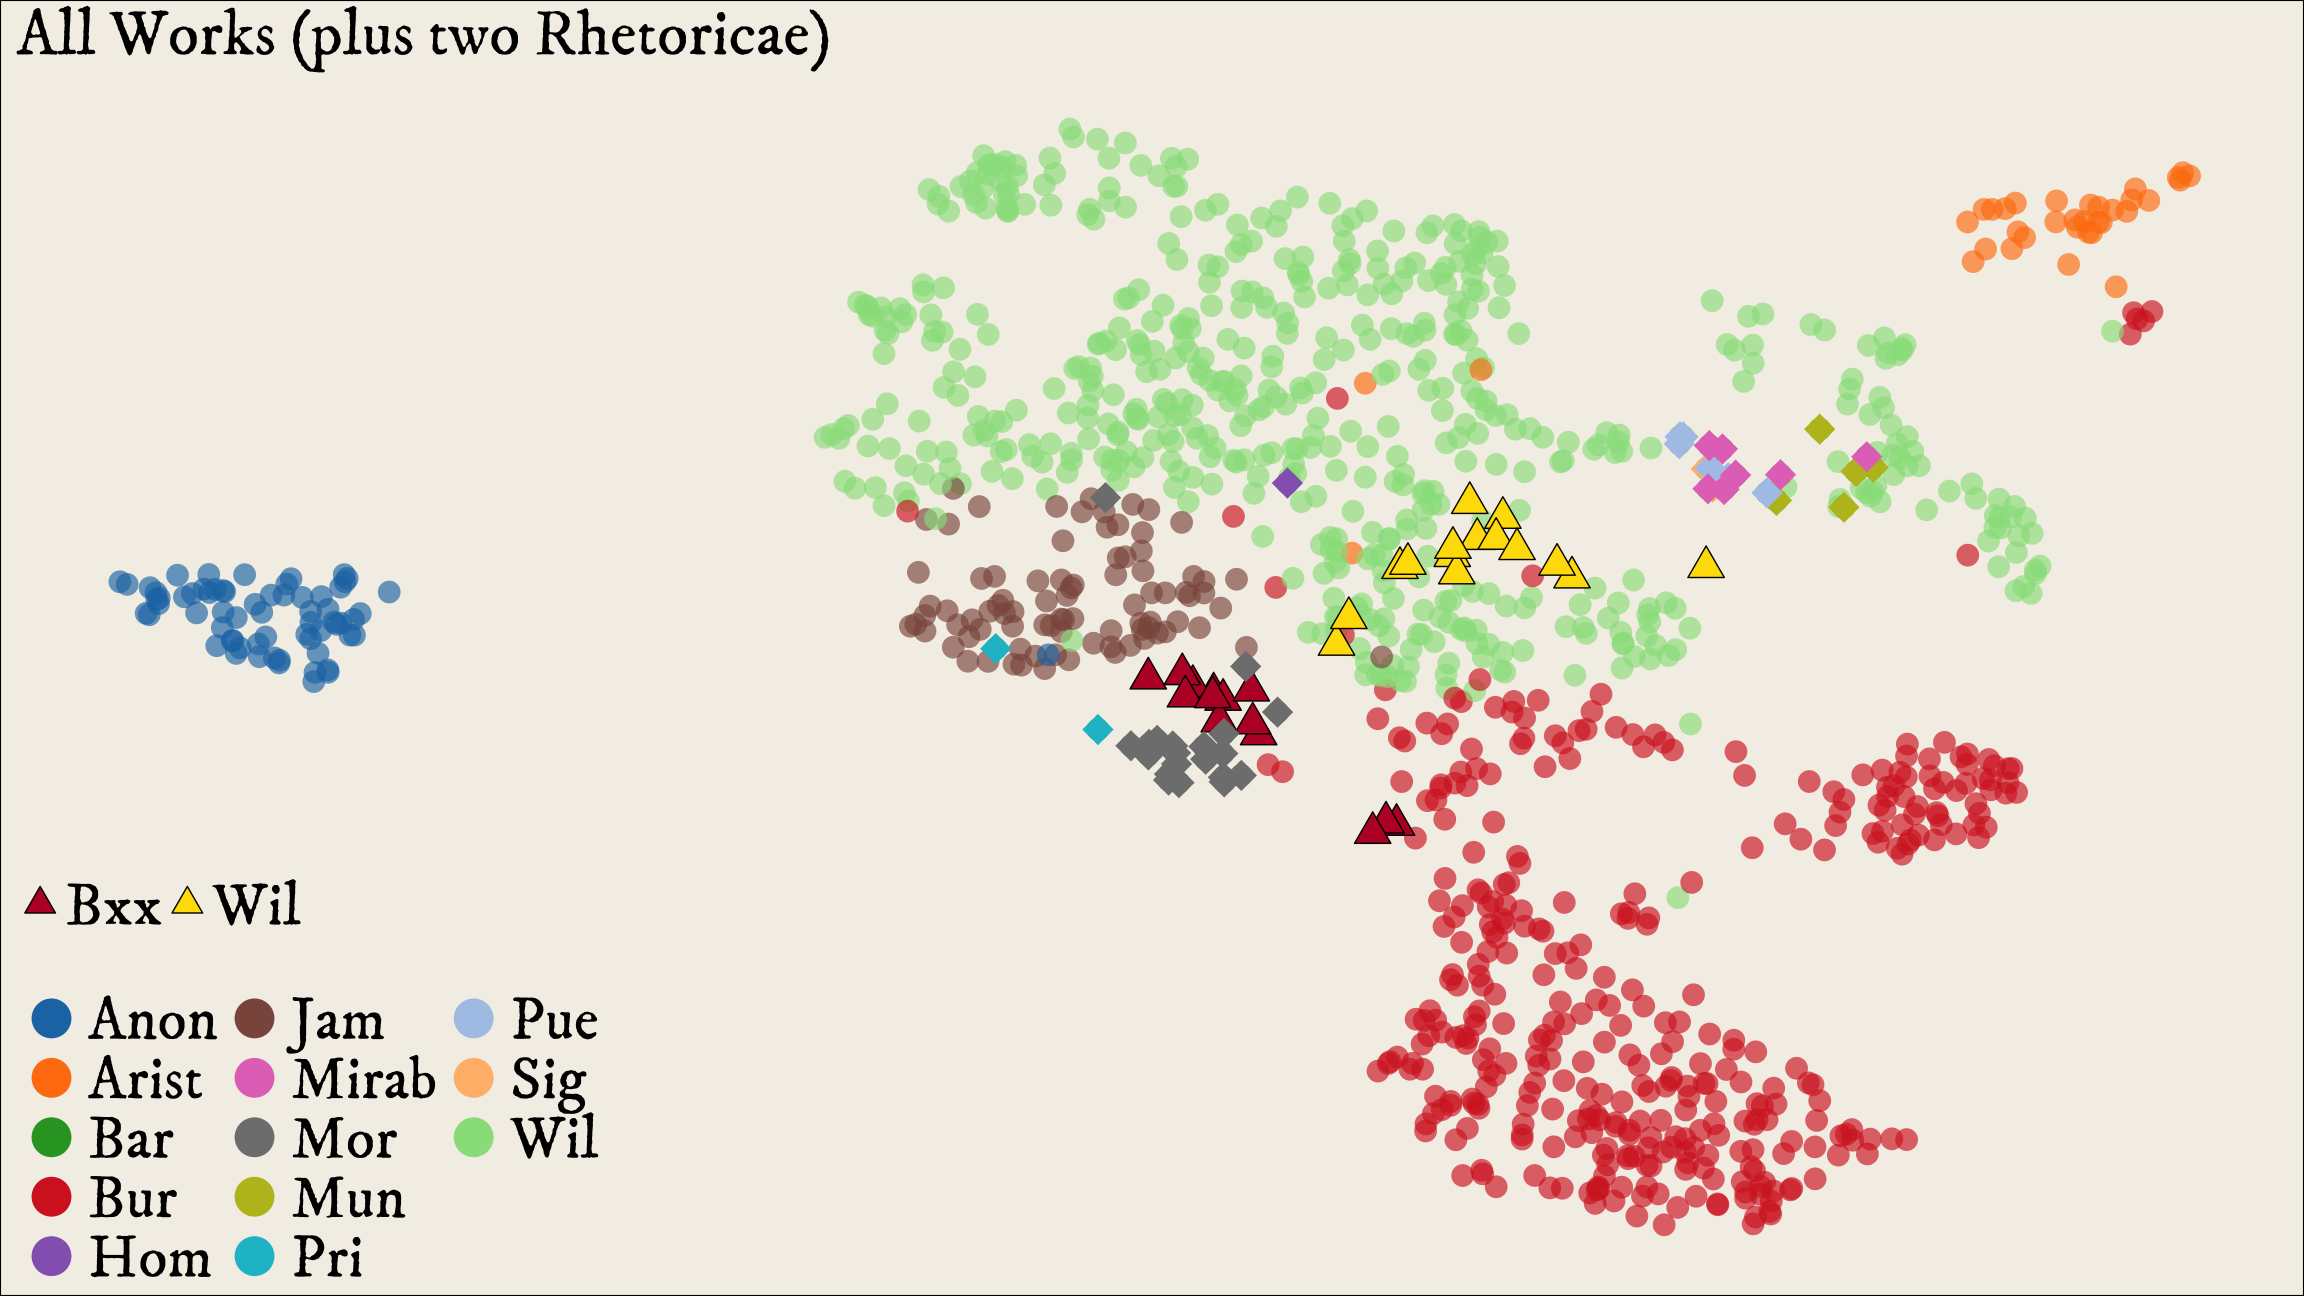

In [75]:
%%R -i all -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8' # antique paper
fgcol = 'black'

ggplot(data=all, aes(x=X, y=Y)) +
geom_point(data = dplyr::filter(all,str_detect(Work,'Rhet',negate=TRUE)),size=5, alpha=0.65, shape=16, aes(color=Translator)) +
geom_point(data=dplyr::filter(all,str_detect(Work,'Rhet')), size=6, shape=24, aes(fill=Translator), alpha=1) +
geom_point(data = dplyr::filter(all,str_detect(Translator,'Bar')),size=7, alpha=1, shape=18, aes(color=Work), guide='none') +

theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s") +
theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("All Works (plus two Rhetoricae)") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=9,alpha=1)),
    fill = guide_legend(ncol=4,override.aes =list(size=5,alpha=1))
) +
    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.13,0.17),
        legend.text=element_text(size=30),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_all.pdf"
# ggsave(fn, dpi=300, width=16, height=9)